In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

C:\Users\77429\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)

Shape of the Dataset: (1017209, 9)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
store = pd.read_csv("store.csv")
print("Shape of the Dataset:",store.shape)
#Display the first 5 rows of data using the head method of pandas dataframe
store.head()

Shape of the Dataset: (1115, 10)


Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [6]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [7]:
df_new.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [8]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores :",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores : 5773.82


In [9]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [10]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [11]:
#We can extract all date properties from a datetime datatype
import numpy as np
df_new['Date']=pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"]=df_new["Date"].dt.month
df_new['Quarter']=df_new['Date'].dt.quarter
df_new['Year']=df_new['Date'].dt.year
df_new['Day']=df_new['Date'].dt.day
df_new['Week']=df_new['Date'].dt.week

df_new['Season']=np.where(df_new['Month'].isin([3,4,5]),"Spring",
                         np.where(df_new['Month'].isin([6,7,8]),"Summer",
                                 np.where(df_new['Month'].isin([9,10,11]),"Fall",
                                        np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))
#Using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

<ipython-input-11-160e16e0e9c3>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_new['Week']=df_new['Date'].dt.week


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


<function matplotlib.pyplot.show(close=None, block=None)>

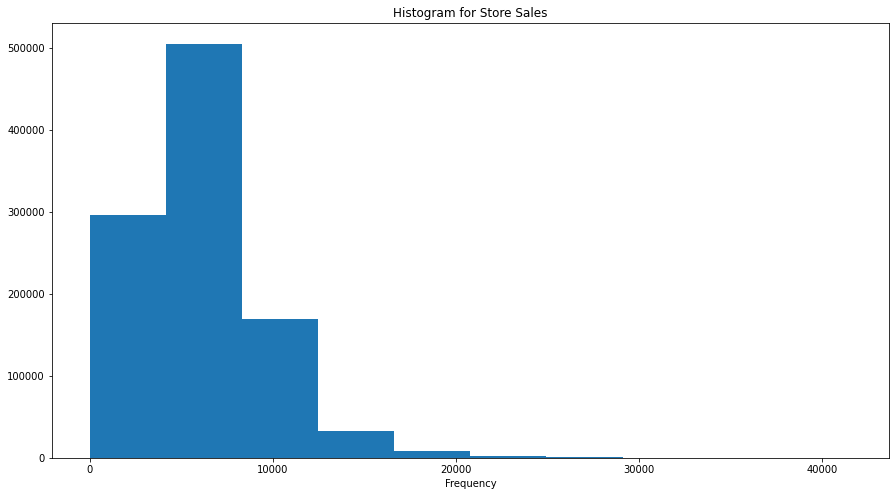

In [12]:
#Import matplotlib,python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline
#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("Frequency")
plt.show

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dty

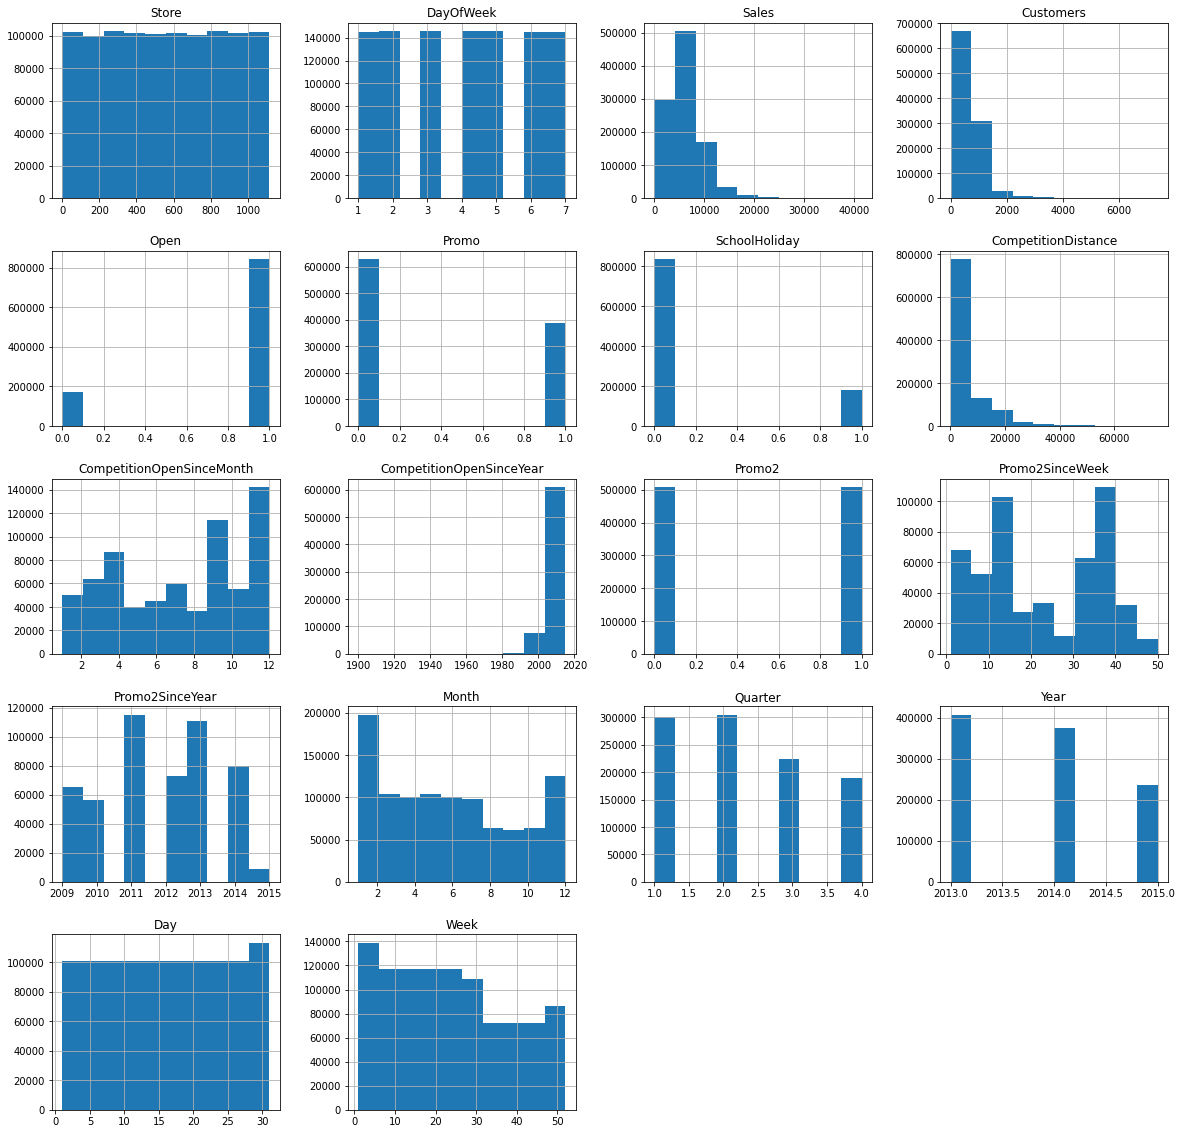

In [13]:
#Use the histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,20))

In [14]:
df_new.isnull().sum()/df_new.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [15]:
#Replace nulls with the mode
df_new['CompetitionDistance']= df_new['CompetitionDistance'].fillna(df_new['CompetitionDistance'].mode()[0])
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0]*100

0.0

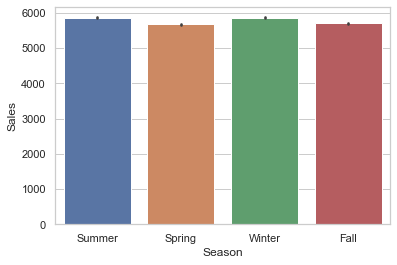

In [16]:
import seaborn as sns #Seaborn is another powerful visualization library for Python
sns.set(style='whitegrid')

#create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x='Season',y='Sales',data=df_new)

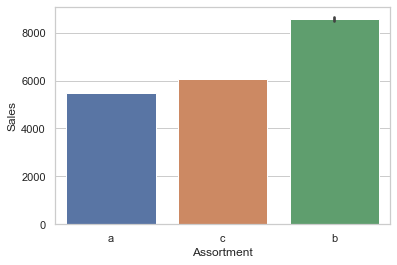

In [17]:
#create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x='Assortment',y='Sales',data=df_new)

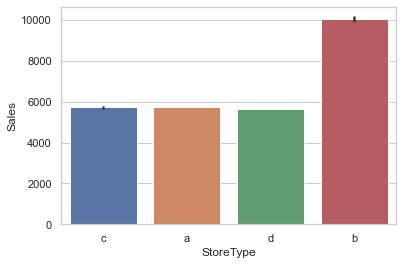

In [18]:
#create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x='StoreType',y='Sales',data=df_new)

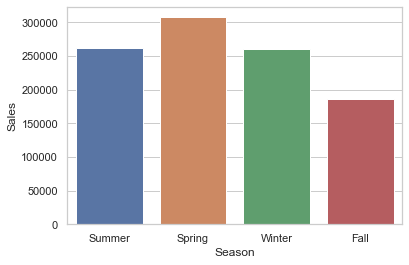

In [19]:
ax = sns.barplot(x='Season',y='Sales',data=df_new,estimator=np.size)

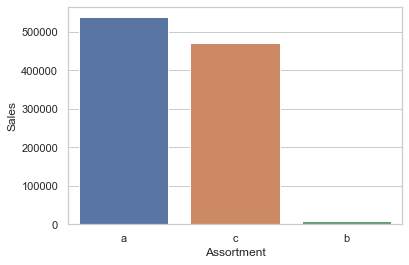

In [20]:
ax = sns.barplot(x='Assortment',y='Sales',data=df_new,estimator=np.size)

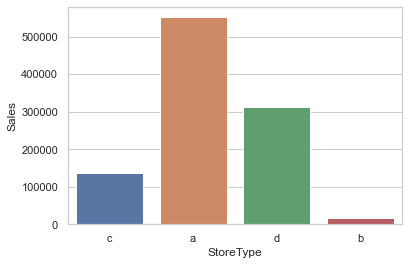

In [21]:
ax = sns.barplot(x='StoreType',y='Sales',data=df_new,estimator=np.size)

In [22]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year","StoreType","Assortment","Season"]

#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df,col):
    le = LabelEncoder()
    a = le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+'_'+str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns = column_names))
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp=pd.concat([temp,temp_df],axis=1)

In [23]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [24]:
print(temp.columns[temp.dtypes=='object'])

Index(['StateHoliday'], dtype='object')


In [25]:
temp['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [26]:
temp['StateHoliday']=np.where(temp['StateHoliday']=='0',0,1)
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [28]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print('Average Sales :',mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [29]:
print('MAE for Test Data:',abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


In [34]:
#Create Deep Neural Network Architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim=44,activation='relu'))
#The input_dim=44,since the widtin of the training data = 44(refer data engg section)
model.add(Dense(1,activation='linear'))

#Configure the model
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

#Train the model
model.fit(x_train.values,y_train.values,validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 7s 575us/step - loss: 1202.1739 - mean_absolute_error: 1202.1739 - val_loss: 820.5206 - val_mean_absolute_error: 820.5206
Epoch 2/10
11444/11444 [==============================] - 6s 558us/step - loss: 797.1683 - mean_absolute_error: 797.1683 - val_loss: 741.0334 - val_mean_absolute_error: 741.0334
Epoch 3/10
11444/11444 [==============================] - 6s 560us/step - loss: 737.8372 - mean_absolute_error: 737.8372 - val_loss: 715.3900 - val_mean_absolute_error: 715.3900
Epoch 4/10
11444/11444 [==============================] - 6s 567us/step - loss: 721.9668 - mean_absolute_error: 721.9668 - val_loss: 718.6010 - val_mean_absolute_error: 718.6010
Epoch 5/10
11444/11444 [==============================] - 6s 563us/step - loss: 710.4649 - mean_absolute_error: 710.4649 - val_loss: 740.3041 - val_mean_absolute_error: 740.3041
Epoch 6/10
11444/11444 [==============================] - 6s 566us/step - loss: 699.4886 - mean_absolute_err

In [35]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
    print('Metric ',model.metrics_names[i],':',str(round(result[i],2)))

6358/6358 [==============================] - 4s 593us/step - loss: 690.0407 - mean_absolute_error: 690.0407
Metric  loss : 690.04
Metric  mean_absolute_error : 690.04



Examining distributed: 100%|█████████▉| 310/311 [01:37<00:00,  1.78it/s]
                                                                        

Determining conflicts:   0%|          | 0/311 [00:00<?, ?it/s]
Examining conflict for get_terminal_size anaconda:   0%|          | 0/311 [00:00<?, ?it/s]
Examining conflict for get_terminal_size ipywidgets h5py prompt_toolkit anaconda-project pycparser astroid python-language-server snowballstemmer nltk typing_extensions beautifulsoup4 powershell_shortcut requests pkginfo python-libarchive-c win_inet_pton markupsafe pexpect cytoolz pynacl qtpy ply sip jupyter bokeh rope diff-match-patch mccabe imagesize prompt-toolkit idna qdarkstyle zipp qtconsole anaconda sphinxcontrib-qthelp mistune chardet json5 openpyxl sphinxcontrib-applehelp pywin32 jupyterlab numba send2trash testpath networkx bkcharts pytest conda-build simplegeneric pep8 pytz packaging py nbconvert bottleneck greenlet sortedcontainers paramiko six sympy fsspec _ipyw_jlab_nb_ext_co

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed


ipykernel -> traitlets[version='>=4.1'] -> ipython_genutils
traitlets -> ipython_genutils
nbconvert -> nbformat[version='>=4.4'] -> ipython_genutils
anaconda==2020.11 -> nbformat==5.0.8=py_0 -> ipython_genutils

Package pbr conflicts for:
mock -> pbr
pytables -> mock -> pbr

Package python-language-server conflicts for:
spyder -> python-language-server[version='>=0.31.2,<0.32.0|>=0.31.9,<0.32.0|>=0.34.0,<1.0.0|>=0.36.1,<1.0.0|>=0.36.2,<1.0.0']
spyder -> pyls-black[version='>=0.4.6'] -> python-language-server[version='>=0.36.2']
anaconda==2020.11 -> python-language-server==0.35.1=py_0
anaconda==2020.11 -> spyder==4.1.5=py37_0 -> python-language-server[version='>=0.34.0,<1.0.0']

Package dask-core conflicts for:
dask -> distributed[version='>=2021.4.0'] -> dask-core[version='>=0.15.2|>=0.16.0|>=0.17.0|>=0.18.0|>=2|>=2.5.2|>=2.7.0|>=2.9.0|>=2020.12.0']
distributed -> dask-core[version='>=0.15.2|>=0.16.0|>=0.17.0|>=0.18.0|>=2|>=2.5.2|>=2.7.0|>=2.9.0|>=2020.12.0']
scikit-image -> dask-core[